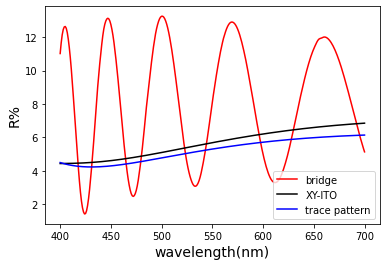

xy-ITO: 5.6307105790467
pattern: 5.210531010245734
delta_d_t: 0.4209968693386086
bridge: (34.05587008718559, -3.2316360796562082, 1.3598934469942314)
xy-ITO: (28.786813421891374, 1.5228619725108083, 5.353545368666612)
pattern: (27.68184357214966, 1.1684073614374735, 4.968826363755241)


In [17]:
import CIE
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
SiO2_L = ml.open_material('SiO2_LENS', 'Sellmeier')
SiN_L = ml.open_material('SiN_LENS', 'Sellmeier')
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_LENS', 'Material')

ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])
L = pd.read_csv('./CIE/linCIE2008v2e_1.csv')[10:-130]['L'].values
wl = np.linspace(400, 700, 301)

hypo_dia = lambda th: tm.Design(
    [air, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th[1], th[2], th[4], th[5], None]
).reflectance(wl)

hypo_bri = lambda th: tm.Design(
    [air, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[1], th[2], th[3], 1200, 50, th[4], th[5], None]
).reflectance(wl)

#f1 = [1707,12,27.1,20,37.1,12]
f2 = [2122.28929493,28,30,27.,30.,8.6]
f3 = [2122.28929493,14.71580371,36.65970178,32.,45.,8.62266763]
f4 = [1729.79214328,14.48240497,38.032268,29.89295768,46.99689601,6.5993801 ]
f5 = [1728.01115927,14.3870235,38.11820806,29.69018659,46.6469324,6.95233569]
f6 = [1717.37238713,14.44418993,32.21384678,22.66133977,33.72499576,9.04278654]
tk = f6

plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
plt.savefig('LENS_rev1_sim2.png')
plt.show()

print('xy-ITO:',100*np.mean(hypo_dia(tk)))
print('pattern:',100*np.mean(hypo_tra(tk)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk)-100*hypo_dia(tk))))

#print('bridge:',116*np.cbrt(sum(hypo_bri(tk)*L)/sum(L))-16)
#print('xy-ITO:',116*np.cbrt(sum(hypo_dia(tk)*L)/sum(L))-16)
#print('pattern:',116*np.cbrt(sum(hypo_tra(tk)*L)/sum(L))-16)
print('bridge:',CIE.Lab(hypo_bri(tk)))
print('xy-ITO:',CIE.Lab(hypo_dia(tk)))
print('pattern:',CIE.Lab(hypo_tra(tk)))

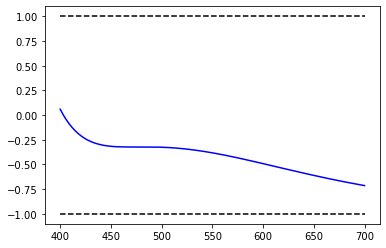

In [8]:
plt.plot(wl, 100*hypo_tra(tk)-100*hypo_dia(tk),'-b')
plt.plot(wl, -np.ones(np.size(wl)),'--k')
plt.plot(wl, np.ones(np.size(wl)),'--k')
#plt.savefig('LENS_rev1_sim2_delta_d_t.png')
plt.show()

xy-ITO: 5.6307105790467
bridge: 8.19034302085787
delta_d_b: 3.616135151659712


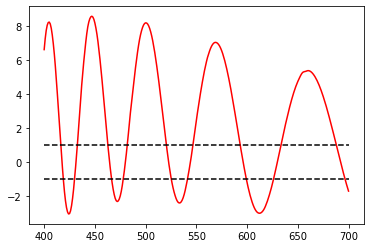

In [14]:
hypo_bri = lambda th: tm.Design(
    [air, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[1], th[2], th[3], 1200, 50, th[4], th[5], None]
).reflectance(wl)

hypo_dia2 = lambda th: tm.Design(
    [air, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

print('xy-ITO:',100*np.mean(hypo_dia2(tk)))
print('bridge:',100*np.mean(hypo_bri(tk)))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk)-100*hypo_dia(tk))))

plt.plot(wl, 100*hypo_bri(tk)-100*hypo_dia2(tk),'-r')
plt.plot(wl, -np.ones(np.size(wl)),'--k')
plt.plot(wl, np.ones(np.size(wl)),'--k')
#plt.savefig('LENS_rev1_sim2_delta_d_b.png')
plt.show()